In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules
import csv 

df = pd.read_csv('data/Grocery_Items_4.csv')

numrows = df.shape[0]

print('transactions: ', numrows)

total_entries = df.stack()
nunique_items = total_entries.nunique()

print("unique items:", nunique_items)

counts = total_entries.value_counts()
pop_item = counts.idxmax()
print("most popular item:", pop_item)

pop_item_filter = (df == pop_item).any(axis=1)
pop_item_entries = pop_item_filter.sum()

print("transactions with most popular item:", pop_item_entries)

with open('data/Grocery_Items_4.csv', 'r') as fileReader:
    reader = csv.reader(fileReader)
    
    csv_list = list(reader)
    
csv_list.remove(csv_list[0])
csv_filter_copy = []

for lists in csv_list:
    tmp = []
    for idx, item in enumerate(lists):
        if item != '':
            tmp.append(item)
    csv_filter_copy.append(tmp)


te = TransactionEncoder()
te_ary = te.fit(csv_filter_copy).transform(csv_filter_copy)
te_df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(te_df, min_support=0.01, use_colnames=True)
frequent_itemsets
associations = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.08)
display(associations)

transactions:  8000
unique items: 166
most popular item: whole milk
transactions with most popular item: 1256


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(other vegetables),0.157000,0.117875,0.014875,0.094745,0.803777,1.0,-0.003631,0.974449,-0.224561,0.057212,-0.026221,0.110469
1,(other vegetables),(whole milk),0.117875,0.157000,0.014875,0.126193,0.803777,1.0,-0.003631,0.964744,-0.216760,0.057212,-0.036544,0.110469
2,(rolls/buns),(soda),0.115875,0.101625,0.010000,0.086300,0.849199,1.0,-0.001776,0.983227,-0.167259,0.048193,-0.017059,0.092350
3,(soda),(rolls/buns),0.101625,0.115875,0.010000,0.098401,0.849199,1.0,-0.001776,0.980619,-0.165044,0.048193,-0.019764,0.092350
4,(whole milk),(soda),0.157000,0.101625,0.012625,0.080414,0.791282,1.0,-0.003330,0.976934,-0.238326,0.051321,-0.023610,0.102323
5,(soda),(whole milk),0.101625,0.157000,0.012625,0.124231,0.791282,1.0,-0.003330,0.962583,-0.226970,0.051321,-0.038872,0.102323
6,(yogurt),(whole milk),0.084750,0.157000,0.012000,0.141593,0.901866,1.0,-0.001306,0.982052,-0.106256,0.052231,-0.018276,0.109013
7,(rolls/buns),(whole milk),0.115875,0.157000,0.015000,0.129450,0.824521,1.0,-0.003192,0.968353,-0.194015,0.058168,-0.032681,0.112496
8,(whole milk),(rolls/buns),0.157000,0.115875,0.015000,0.095541,0.824521,1.0,-0.003192,0.977518,-0.201572,0.058168,-0.022999,0.112496
9,(rolls/buns),(other vegetables),0.115875,0.117875,0.010375,0.089536,0.759585,1.0,-0.003284,0.968874,-0.263617,0.046447,-0.032126,0.088777


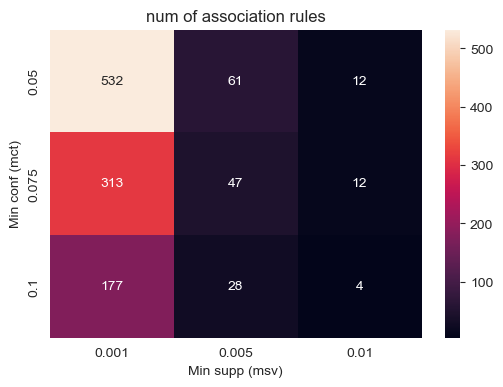

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

msv = [0.001, 0.005, 0.01]
mct = [0.05, 0.075, 0.1] 

ruleset = pd.DataFrame(index=mct, columns=msv)

for supp in msv:
    itemsets = fpgrowth(te_df, min_support=supp, use_colnames=True)
    for conf in mct:
        rule = association_rules(itemsets, metric="confidence", min_threshold=conf)
        
        ruleset.loc[conf, supp] = len(rule)
        
ruleset = ruleset.astype(int)
#print(ruleset)

plt.figure(figsize=(6, 4))
sns.heatmap(ruleset, annot=True, fmt="d")       

plt.xlabel("Min supp (msv)")
plt.ylabel("Min conf (mct)")
plt.title("num of association rules")
plt.show()

In [44]:
import numpy as np
import keras
from keras import layers
import os
import glob

# Model / data parameters
num_classes = 4
input_shape = (256, 256, 3) #256x256 images 3 rgb channels

classes = ["cloudy", "desert", "green_area", "water"]

path_list = []
label_list = []
#for path in glob.glob(os.path.join(dir, "*.jpg"))
for label, clsname in enumerate(classes):
    t_dir = "data/"+clsname
    for path in glob.glob(os.path.join(t_dir, "*.jpg")): #
        path_list.append(path)
        label_list.append(label)
    
num_images = len(path_list)

#tesor setup for images and labels
x = np.zeros((num_images, 256, 256, 3), dtype="float32") #shape to hold all image features
y = np.array(label_list, dtype="int32") #label list

for i, path in enumerate(path_list):
    #resise to 256x256 may be redudnant due to everything I checked being the same size but resizing for sanity check so there is no shape overlap
    img = keras.utils.load_img(path, target_size=(256, 256))
    t_arr = keras.utils.img_to_array(img)
    x[i] = t_arr/255.0 #scale images

#manual shuffle/split
indices = np.arange(num_images)
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

split = int(0.8 * num_images)
x_train, x_test = x[:split], x[split:]
y_train_int, y_test_int = y[:split], y[split:]


y_train = keras.utils.to_categorical(y_train_int, num_classes)
y_test = keras.utils.to_categorical(y_test_int, num_classes)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(8, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 64
epochs = 20

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,       # inital test val 16 if fast will do 32
                                 #64 ended up being just fine suprisingly and yeilded good results
    epochs=epochs,
    validation_split=0.2
)

score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (4504, 256, 256, 3)
4504 train samples
1127 test samples


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 4)    │           292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 15376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │       123,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,568 (482.69 KB)

 Trainable params: 123,568 (482.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.4457 - loss: 1.1000 - val_accuracy: 0.4650 - val_loss: 0.8767
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6323 - loss: 0.6198 - val_accuracy: 0.7458 - val_loss: 0.5049
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7247 - loss: 0.5034 - val_accuracy: 0.7170 - val_loss: 0.5478
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7447 - loss: 0.4630 - val_accuracy: 0.7159 - val_loss: 0.4874
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7485 - loss: 0.4575 - val_accuracy: 0.7769 - val_loss: 0.4354
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7555 - loss: 0.4582 - val_accuracy: 0.7425 - val_loss: 0.4900
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.7505 - loss: 0.4542 - val_accuracy: 0.7747 - val_loss: 0.4433
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7544 - loss: 0.4534 - val_accuracy: 0.7714 - v

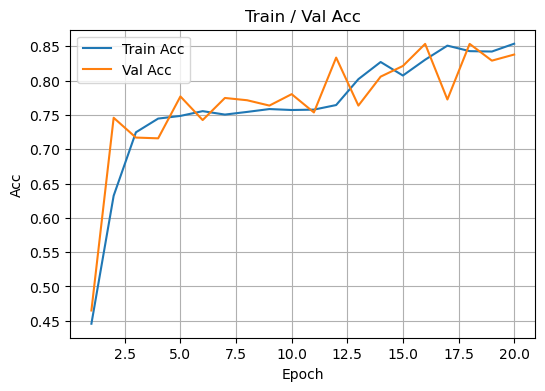

In [48]:
train_acc = history.history["accuracy"] #pulling metrics from keras history (super helpful I wish i knew this existed in deep learning)
val_acc = history.history["val_accuracy"]

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_acc, label="Train Acc")
plt.plot(epochs_range, val_acc, label="Val Acc")

plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("Train / Val Acc")
plt.legend()
plt.grid(True)
plt.show()

x_train shape: (4504, 256, 256, 3)
4504 train samples
1127 test samples


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 123, 123, 4)    │           804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 61, 61, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 14884)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │       119,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,144 (469.31 KB)

 Trainable params: 120,144 (469.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7372 - loss: 0.5594 - val_accuracy: 0.6326 - val_loss: 0.6343
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8035 - loss: 0.4693 - val_accuracy: 0.7969 - val_loss: 0.4282
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8354 - loss: 0.3991 - val_accuracy: 0.8324 - val_loss: 0.3915
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8543 - loss: 0.3682 - val_accuracy: 0.8613 - val_loss: 0.3533
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8379 - loss: 0.3943 - val_accuracy: 0.8335 - val_loss: 0.3558
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8465 - loss: 0.3685 - val_accuracy: 0.8368 - val_loss: 0.3640
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8587 - loss: 0.3449 - val_accuracy: 0.8546 - val_loss: 0.3454
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8485 - loss: 0.3485 - val_accuracy: 0.8679 - v

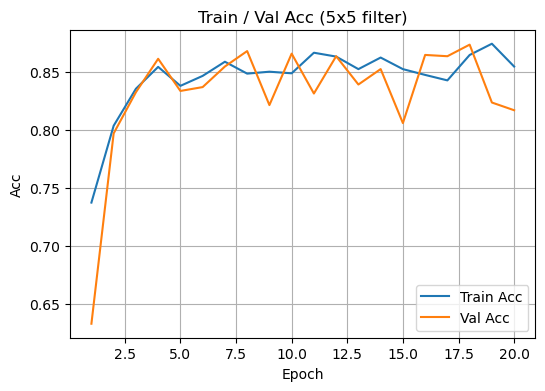

In [53]:
#First the 5x5 version:
#manual shuffle/split
indices = np.arange(num_images)
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

split = int(0.8 * num_images)
x_train, x_test = x[:split], x[split:]
y_train_int, y_test_int = y[:split], y[split:]


y_train = keras.utils.to_categorical(y_train_int, num_classes)
y_test = keras.utils.to_categorical(y_test_int, num_classes)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(4, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(8, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 64
epochs = 20

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,       
    epochs=epochs,
    validation_split=0.2
)

score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

train_acc = history.history["accuracy"] 
val_acc = history.history["val_accuracy"]

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_acc, label="Train Acc")
plt.plot(epochs_range, val_acc, label="Val Acc")

plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("Train / Val Acc (5x5 filter)")
plt.legend()
plt.grid(True)
plt.show()


x_train shape: (4504, 256, 256, 3)
4504 train samples
1127 test samples


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 254, 254, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 121, 121, 4)    │         1,572 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 60, 60, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │       115,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,040 (457.19 KB)

 Trainable params: 117,040 (457.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.4238 - loss: 1.1530 - val_accuracy: 0.4628 - val_loss: 1.0619
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.4674 - loss: 1.0329 - val_accuracy: 0.4451 - val_loss: 1.0123
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5085 - loss: 1.0011 - val_accuracy: 0.4728 - val_loss: 0.9818
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5268 - loss: 0.9846 - val_accuracy: 0.5039 - val_loss: 0.9494
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5509 - loss: 0.9250 - val_accuracy: 0.5871 - val_loss: 0.8990
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5706 - loss: 0.8682 - val_accuracy: 0.4983 - val_loss: 0.8544
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5909 - loss: 0.8078 - val_accuracy: 0.5527 - val_loss: 0.7950
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6150 - loss: 0.7599 - val_accuracy: 0.5649 - v

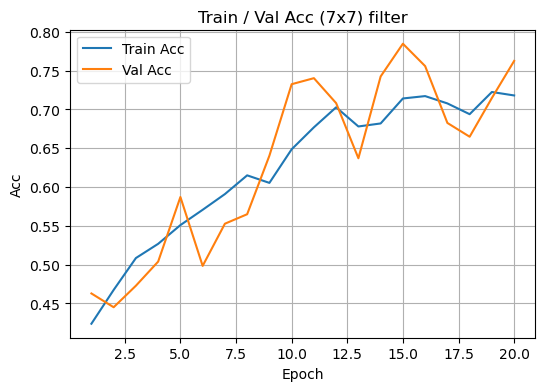

In [52]:
#second the 7x7 version:
#manual shuffle/split
indices = np.arange(num_images)
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

split = int(0.8 * num_images)
x_train, x_test = x[:split], x[split:]
y_train_int, y_test_int = y[:split], y[split:]


y_train = keras.utils.to_categorical(y_train_int, num_classes)
y_test = keras.utils.to_categorical(y_test_int, num_classes)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(4, kernel_size=(7, 7), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(8, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 64
epochs = 20

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,       
    epochs=epochs,
    validation_split=0.2
)

score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

train_acc = history.history["accuracy"] 
val_acc = history.history["val_accuracy"]

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_acc, label="Train Acc")
plt.plot(epochs_range, val_acc, label="Val Acc")

plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("Train / Val Acc (7x7) filter")
plt.legend()
plt.grid(True)
plt.show()


When comparing the performance of each model with its own filter size before I attempted to adjust the filter sizes I found I was not getting any promising results, I ended up increasing the batch size to 64 which I was weary of doing becuase I had never trained any other models (mostly in pytorch) with batch size that high due to the worry of memory space but I assume that the comparatively smaller dataset made it such that it was easer to work with and it increased my general accuracy substantially.

When then adjusting my filter sizes I was suprised to see the there wasnt much evidence of extremely strong uver or underfitting generally across all the models, as generally the validation and testing acuraccy change proportionalyl well to eachouther, with 7x7 being an exception showing evidence of a slower learning curve, but learning is present nonetheless, 5x5 is also intresting becuase unlike the other examples, the training accuracy is extremely high right off the bat but ends up in about the same area as the 3x3 model.

In [3]:
import numpy as np
import keras
from keras import layers
import os
import glob
import torch
from transformers import AutoTokenizer
from datasets import load_dataset
import pandas as pd

DS_Paths = {
    "train": "data/student_4/train.json",
    "validation": "data/student_4/validation.json",
    "test": "data/student_4/test.json"
}

dataset = load_dataset("json", data_files = DS_Paths)

#from tutorial

labels = [label for label in dataset['train'].features.keys() if label not in ['ID', 'Tweet']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
print(labels)


tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
  # take a batch of texts
  text = examples["Tweet"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()
  
  return encoding

encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

example = encoded_dataset['train'][0]
print(example.keys())

tokenizer.decode(example['input_ids'])

print(torch.__version__)
encoded_dataset.set_format(type="torch")

['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
2.7.1+cu118


C:\Users\galla\miniconda3\Lib\site-packages\datasets\utils\_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
  obj.co_lnotab,  # for < python 3.10 [not counted in args]
C:\Users\galla\miniconda3\Lib\site-packages\datasets\utils\_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
  obj.co_lnotab,  # for < python 3.10 [not counted in args]
C:\Users\galla\miniconda3\Lib\site-packages\datasets\utils\_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
  obj.co_lnotab,  # for < python 3.10 [not counted in args]


In [8]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained ("bert-base-uncased", 
                                                            problem_type="multi_label_classification", 
                                                           num_labels=len(labels),
                                                            id2label=id2label,
                                                           label2id=label2id)

batch_size = 8
metric_name = "f1"

from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    eval_strategy = "epoch", #had to rename to new param diff from tutorial
    save_strategy = "epoch",
    logging_strategy="epoch", #added to easily save losses for plotting
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch
    
# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

In [10]:
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#with cuda took 3 minutes, on cpu was over 2 hours
print(f"Using device: {device}")
trainer.train()

C:\Users\galla\AppData\Local\Temp\ipykernel_17424\1696295435.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Using device: cuda


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.423500,0.351742,0.620126,0.734425,0.225000
2,0.318700,0.329267,0.649940,0.755621,0.257500
3,0.269400,0.320266,0.692221,0.786950,0.302500
4,0.239000,0.322189,0.685619,0.784682,0.282500
5,0.219800,0.320873,0.690623,0.786583,0.302500


TrainOutput(global_step=1875, training_loss=0.29409921875, metrics={'train_runtime': 214.9349, 'train_samples_per_second': 69.789, 'train_steps_per_second': 8.724, 'total_flos': 986746187520000.0, 'train_loss': 0.29409921875, 'epoch': 5.0})

In [11]:
trainer.evaluate()

{'eval_loss': 0.3202660381793976,
 'eval_f1': 0.6922209695603156,
 'eval_roc_auc': 0.7869495166487649,
 'eval_accuracy': 0.3025,
 'eval_runtime': 1.3545,
 'eval_samples_per_second': 295.31,
 'eval_steps_per_second': 36.914,
 'epoch': 5.0}

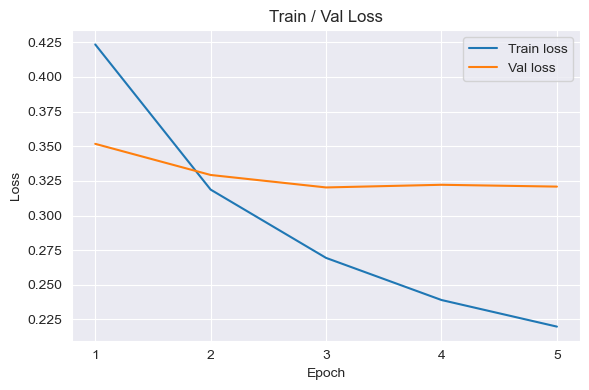

In [27]:
import matplotlib.pyplot as plt

logs = trainer.state.log_history #from my change above the trainer object itself now has logs

train_loss = []
val_loss = []

    #found that the log object has all attributes split across multime indices per epoch
for entry in logs:
    if "loss" in entry:
        train_loss.append(entry["loss"])
    if "eval_loss" in entry and len(val_loss) != 5: #val_loss was grabbing extra values
        val_loss.append(entry["eval_loss"])

epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_loss, label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train / Val Loss")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
#actually testing model first for all labels must match
test_output = trainer.predict(encoded_dataset["test"])

#pretty sure I can just use the multi label from tutorial
metrics = multi_label_metrics(
    predictions=test_output.predictions,
    labels=test_output.label_ids
)

print("accuracy (all labels):", metrics["accuracy"])

accuracy (all labels): 0.2813333333333333


In [32]:
def any_label_metrics(predictions, labels, threshold=0.5):
    #starts same as tutorial version
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    y_true = labels
    #tried just comparing equality, counted 0s too 
    matches = (y_true * y_pred).sum(axis=1)
    correct = (matches>0)
    accuracy = correct.mean()
    
    return accuracy

any_metrics = any_label_metrics(predictions=test_output.predictions,
    labels=test_output.label_ids)
print("accuracy (any label):", any_metrics)

accuracy (any label): 0.848


accuracy (all labels): 0.2813333333333333
accuracy (any label): 0.848